# **QSAR Model Building of Dopamine Active Transporter Inhibitors**


# Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = 'https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/05082021/DAT/DAT_bioactivity_data_3class_pIC50_pubchem_fp_05082021.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.428291
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.392545
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.327902
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.144481
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.935168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.769296
1746,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.737075
1747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
1748,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.351133


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1746,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1748,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0       6.428291
1       6.392545
2       6.327902
3       6.144481
4       5.935168
          ...   
1745    5.769296
1746    5.737075
1747    7.200659
1748    5.351133
1749    5.584860
Name: pIC50, Length: 1750, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP12,PubchemFP15,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP38,PubchemFP143,PubchemFP145,...,PubchemFP755,PubchemFP756,PubchemFP773,PubchemFP776,PubchemFP780,PubchemFP797,PubchemFP801,PubchemFP818,PubchemFP819,PubchemFP836
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1746,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1747,1,1,1,1,0,0,0,0,1,1,...,1,0,0,1,0,1,0,1,0,0
1748,1,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
X.to_csv('descriptor_list.csv', index = False)

In [19]:
# In the app, use the following to get this same descriptor list
# of 158 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8025793681809088

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([6.54401612, 7.50121646, 6.23831697, ..., 6.79771688, 5.77978861,
       5.84800088])

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.30
Coefficient of determination (R^2): 0.80


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

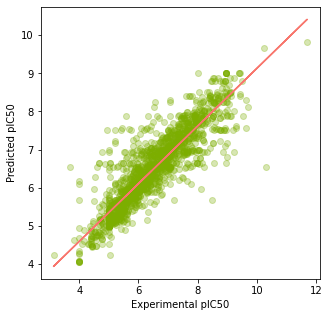

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [15]:
import pickle

In [16]:
pickle.dump(model, open('DAT_model.pkl', 'wb'))